# CREDITS DATASET

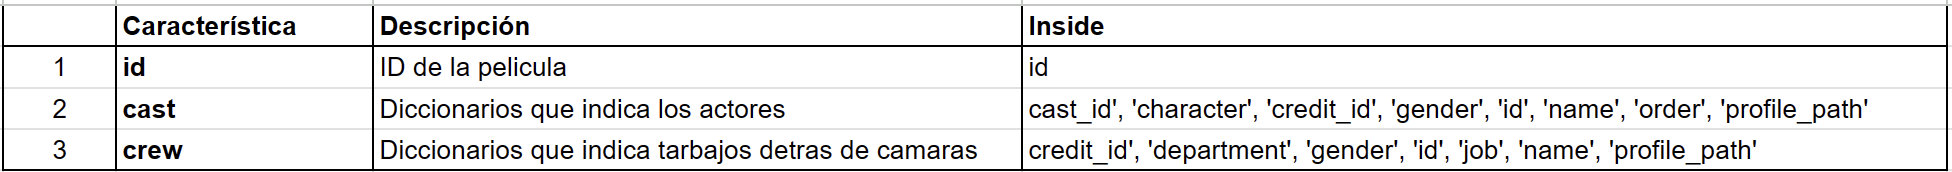

In [1]:
# importar librerias
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns

import ast

In [124]:
# cargar datos
df = pd.read_csv('credits_dataset.csv', sep=',', encoding='utf-8')

In [131]:
#  eda
pd.set_option('display.max_columns', None) # mostrar todas las columnas
df.sample(5)

,cast,crew,id
33323,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '52fe4bb6c3a36847f8210d2d', 'de...",117493
34513,"[{'cast_id': 1, 'character': 'Hibat', 'credit_...","[{'credit_id': '56e12e27c3a3680a29001e31', 'de...",364137
39955,"[{'cast_id': 8, 'character': 'Dr. Hugh Bud Kee...","[{'credit_id': '52fe4b30c3a368484e17c5a7', 'de...",129006
39510,"[{'cast_id': 2, 'character': 'Damon Miller', '...","[{'credit_id': '554217c89251414af0003ce8', 'de...",262542
31749,"[{'cast_id': 11, 'character': 'Valdoma', 'cred...","[{'credit_id': '52fe4b8ac3a368484e18e115', 'de...",132137


In [132]:
df.loc[26549]['crew']

"[{'credit_id': '52fe469bc3a36847f8108373', 'department': 'Directing', 'gender': 2, 'id': 19093, 'job': 'Director', 'name': 'George Marshall', 'profile_path': '/i1FThWBJ62u2biOcrprrqRjAB9n.jpg'}, {'credit_id': '52fe469bc3a36847f810837f', 'department': 'Production', 'gender': 2, 'id': 33223, 'job': 'Producer', 'name': 'Hal Roach', 'profile_path': '/6VQIciKwBUsoJGDBlnIMV2iS4Cm.jpg'}, {'credit_id': '52fe469bc3a36847f81083a7', 'department': 'Directing', 'gender': 2, 'id': 33228, 'job': 'Director', 'name': 'Harry Black', 'profile_path': None}, {'credit_id': '52fe469bc3a36847f810839b', 'department': 'Writing', 'gender': 2, 'id': 89670, 'job': 'Writer', 'name': 'Stan Laurel', 'profile_path': '/cYrYC6qpRng0aB34zscpxMGxdx3.jpg'}, {'credit_id': '52fe469bc3a36847f810836d', 'department': 'Sound', 'gender': 2, 'id': 89738, 'job': 'Music', 'name': 'Marvin Hatley', 'profile_path': None}, {'credit_id': '52fe469bc3a36847f81083a1', 'department': 'Writing', 'gender': 2, 'id': 93901, 'job': 'Writer', 'nam

existe mas de un director por pelicula

In [133]:
# eda
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


# valores nulos

In [134]:
# contar cantidad de nulos por cada variable
df.isna().sum()

cast    0
crew    0
id      0
dtype: int64

In [135]:
# verificar cantidad de registros con listas vacias
df[df['cast']=='[]'].count()

cast    2418
crew    2418
id      2418
dtype: int64

2418 listas vacias en la columna cast

In [136]:
# verificar cantidad de registros con listas vacias
df[df['crew']=='[]'].count()

cast    771
crew    771
id      771
dtype: int64

771 listas vacias en la columna crew

# organizar columnas

In [137]:
# organizar columnas
df = df[['id', 'cast', 'crew']]

# extraer datos anidados

In [138]:
# funcion 
def GetData(x):
    if pd.isnull(x):
        return np.nan
    else: 
        return ast.literal_eval(x)   

In [139]:
# invocar funcion
df['cast'] = df['cast'].apply(GetData)

In [140]:
# extraer dato  str
df['cast.name'] = df['cast'].apply(lambda x: ', '.join(map(str, [i['name'] for i in x])))

In [141]:
# invocar funcion
df['crew'] = df['crew'].apply(GetData)

In [142]:
# extraer dato str
df['crew.director.name']= df['crew'].apply(lambda x: ', '.join(map(str, [i['name'] for i in x if i['job']=='Director'])))

In [143]:
# validar cambios
df.head(5)

,id,cast,crew,cast.name,crew.director.name
0,862,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",John Lasseter
1,8844,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",Joe Johnston
2,15602,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","Walter Matthau, Jack Lemmon, Ann-Margret, Soph...",Howard Deutch
3,31357,"[{'cast_id': 1, 'character': 'Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","Whitney Houston, Angela Bassett, Loretta Devin...",Forest Whitaker
4,11862,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","Steve Martin, Diane Keaton, Martin Short, Kimb...",Charles Shyer


# eliminar columnas

In [144]:
# eliminar columnas
df.drop(['cast', 'crew'], axis=1, inplace=True)

In [145]:
# validar cambios
df.head(5)

,id,cast.name,crew.director.name
0,862,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",John Lasseter
1,8844,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",Joe Johnston
2,15602,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...",Howard Deutch
3,31357,"Whitney Houston, Angela Bassett, Loretta Devin...",Forest Whitaker
4,11862,"Steve Martin, Diane Keaton, Martin Short, Kimb...",Charles Shyer


In [146]:
# verificar cantidad de registros sin dato
df[df['cast.name']==''].count()

id                    2418
cast.name             2418
crew.director.name    2418
dtype: int64

remplazar 2418 registros sin dato columna cast.name por 'No Data'  

In [147]:
# remplazar
df['cast.name']= df['cast.name'].apply(lambda x: 'No Data' if x=='' else x)

In [148]:
# validar cambios
df[df['cast.name']=='']

,id,cast.name,crew.director.name


In [149]:
# verificar cantidad de registros con listas vacias
df[df['crew.director.name']==''].count()

id                    887
cast.name             887
crew.director.name    887
dtype: int64

remplazar 887 registros sin dato columna crew.director.name por 'No Data'

In [150]:
df['crew.director.name']= df['crew.director.name'].apply(lambda x: 'No Data' if x=='' else x)

In [151]:
# validar cambios
df[df['crew.director.name']=='']

,id,cast.name,crew.director.name


In [152]:
df.sample(5)

,id,cast.name,crew.director.name
29215,181801,No Data,James Ingrassia
35891,77600,"Joanna Brodzik, Beata Kawka, Bogusław Linda",Bogusław Linda
34487,344043,No Data,Martin Edralin
3758,1588,"Kirsten Dunst, Jesse Bradford, Eliza Dushku, G...",Peyton Reed
7704,96255,"Claudette Colbert, Patric Knowles, Florence De...",Jean Negulesco


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  45476 non-null  int64 
 1   cast.name           45476 non-null  object
 2   crew.director.name  45476 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [155]:
# dataset
df.to_csv('credits_datasetB.csv', index=False)